<a href="https://colab.research.google.com/github/elisabethelen/UAS06DL-2025/blob/main/ModelCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path dataset awal (yang berisi folder daun)
source_dir = '/content/drive/MyDrive/DatasetFloraGroup'

# Path output dataset setelah split
output_base = '/content/drive/MyDrive/DatasetFloraSplit'

Mounted at /content/drive


In [ ]:
source_dir = '/content/drive/MyDrive/DatasetFloraGroup '  # ← sesuai hasil yang muncul

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameter
img_size = (224, 224)
batch_size = 32

# Direktori data
train_dir = '/content/drive/MyDrive/DatasetFloraSplit/train'
val_dir = '/content/drive/MyDrive/DatasetFloraSplit/val'

# Augmentasi dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generator data latih dengan shuffle ON
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True        # ✅ penting untuk memastikan data acak per epoch
)

# Generator data validasi tanpa shuffle
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False       # ✅ biarkan urut untuk evaluasi stabil
)

# Jumlah kelas dari data
num_classes = len(train_data.class_indices)

# Label kelas
class_labels = list(train_data.class_indices.keys())

Found 529 images belonging to 8 classes.
Found 137 images belonging to 8 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential, Input, Model # Added Sequential, Input, Model
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.optimizers import Adam # Added Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Added EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense # Added CNN layers

**TRAINNING MODEL CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle, os

# ── 1. Bangun & kompilasi model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# ── 2. Path penyimpanan
model_path   = '/content/drive/MyDrive/models/cnn_daun_12kelas.h5'
history_path = '/content/drive/MyDrive/models/cnn_daun_12kelas_history.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# ── 3. Callback hanya untuk simpan model terbaik
checkpoint = ModelCheckpoint(model_path, monitor='val_loss',
                             save_best_only=True, verbose=1)

# ── 4. Training tanpa early stopping
cnn_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[checkpoint]
)

# ── 5. Simpan history training ke .pkl
with open(history_path, 'wb') as f:
    pickle.dump(cnn_history.history, f)

print(f'Model terbaik disimpan di: {model_path}')
print(f'History   disimpan di: {history_path}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2191 - loss: 2.6543 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.81763, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 288s 17s/step - accuracy: 0.2186 - loss: 2.6370 - val_accuracy: 0.2847 - val_loss: 1.8176
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2937 - loss: 1.7942
Epoch 2: val_loss improved from 1.81763 to 1.69432, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.2953 - loss: 1.7919 - val_accuracy: 0.3431 - val_loss: 1.6943
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4329 - loss: 1.6338
Epoch 3: val_loss improved from 1.69432 to 1.51245, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.4342 - loss: 1.6305 - val_accuracy: 0.4526 - val_loss: 1.5125
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4821 - loss: 1.4675
Epoch 4: val_loss improved from 1.51245 to 1.43045, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.4843 - loss: 1.4662 - val_accuracy: 0.4891 - val_loss: 1.4304
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5318 - loss: 1.3592
Epoch 5: val_loss improved from 1.43045 to 1.39773, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.5337 - loss: 1.3558 - val_accuracy: 0.5036 - val_loss: 1.3977
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5721 - loss: 1.2729
Epoch 6: val_loss improved from 1.39773 to 1.17163, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.5735 - loss: 1.2688 - val_accuracy: 0.6131 - val_loss: 1.1716
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5930 - loss: 1.1298
Epoch 7: val_loss improved from 1.17163 to 1.11918, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 92s 6s/step - accuracy: 0.5944 - loss: 1.1281 - val_accuracy: 0.5766 - val_loss: 1.1192
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6796 - loss: 0.9816
Epoch 8: val_loss did not improve from 1.11918
17/17 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6783 - loss: 0.9853 - val_accuracy: 0.5547 - val_loss: 1.1917
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6477 - loss: 0.9962
Epoch 9: val_loss improved from 1.11918 to 1.01883, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.6475 - loss: 0.9955 - val_accuracy: 0.6350 - val_loss: 1.0188
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6715 - loss: 0.8679
Epoch 10: val_loss improved from 1.01883 to 0.95657, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.6719 - loss: 0.8695 - val_accuracy: 0.6496 - val_loss: 0.9566
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7253 - loss: 0.7840
Epoch 11: val_loss did not improve from 0.95657
17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.7245 - loss: 0.7861 - val_accuracy: 0.6423 - val_loss: 1.0851
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7052 - loss: 0.8802
Epoch 12: val_loss improved from 0.95657 to 0.94542, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.7058 - loss: 0.8764 - val_accuracy: 0.6350 - val_loss: 0.9454
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7183 - loss: 0.8118
Epoch 13: val_loss improved from 0.94542 to 0.83564, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.7187 - loss: 0.8094 - val_accuracy: 0.6934 - val_loss: 0.8356
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7624 - loss: 0.7010
Epoch 14: val_loss improved from 0.83564 to 0.80787, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.7622 - loss: 0.7018 - val_accuracy: 0.7299 - val_loss: 0.8079
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7576 - loss: 0.6679
Epoch 15: val_loss did not improve from 0.80787
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.7582 - loss: 0.6699 - val_accuracy: 0.6788 - val_loss: 0.8672
Epoch 16/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7487 - loss: 0.6999
Epoch 16: val_loss did not improve from 0.80787
17/17 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.7495 - loss: 0.6999 - val_accuracy: 0.6569 - val_loss: 0.9005
Epoch 17/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7272 - loss: 0.7489
Epoch 17: val_loss did not improve from 0.80787
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7283 - loss: 0.7473 - val_accuracy: 0.6423 - val_loss: 0.9719
Epoch 18/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7882 - loss: 0.5766
Epoch 18: val_loss did not improve from 0.80787
17/17 ━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.8079 - loss: 0.6283 - val_accuracy: 0.7372 - val_loss: 0.6823
Epoch 20/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7753 - loss: 0.5964
Epoch 20: val_loss did not improve from 0.68231
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.7753 - loss: 0.5980 - val_accuracy: 0.7883 - val_loss: 0.7022
Epoch 21/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8359 - loss: 0.5279
Epoch 21: val_loss did not improve from 0.68231
17/17 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8343 - loss: 0.5313 - val_accuracy: 0.7518 - val_loss: 0.6971
Epoch 22/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8327 - loss: 0.5641
Epoch 22: val_loss did not improve from 0.68231
17/17 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8319 - loss: 0.5640 - val_accuracy: 0.7007 - val_loss: 0.8079
Epoch 23/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8611 - loss: 0.4908
Epoch 23: val_loss improved from 0.68231 to 0.60367, saving 

17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.8597 - loss: 0.4928 - val_accuracy: 0.8102 - val_loss: 0.6037
Epoch 24/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8320 - loss: 0.5715
Epoch 24: val_loss did not improve from 0.60367
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8322 - loss: 0.5687 - val_accuracy: 0.7810 - val_loss: 0.6354
Epoch 25/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8436 - loss: 0.5417
Epoch 25: val_loss did not improve from 0.60367
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8434 - loss: 0.5395 - val_accuracy: 0.8029 - val_loss: 0.6127
Epoch 26/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8375 - loss: 0.4771
Epoch 26: val_loss improved from 0.60367 to 0.60273, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.8368 - loss: 0.4788 - val_accuracy: 0.8029 - val_loss: 0.6027
Epoch 27/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8558 - loss: 0.4932
Epoch 27: val_loss improved from 0.60273 to 0.54139, saving model to /content/drive/MyDrive/models/cnn_daun_12kelas.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.8552 - loss: 0.4932 - val_accuracy: 0.7956 - val_loss: 0.5414
Epoch 28/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8337 - loss: 0.4716
Epoch 28: val_loss did not improve from 0.54139
17/17 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.8332 - loss: 0.4728 - val_accuracy: 0.8029 - val_loss: 0.6066
Epoch 29/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8605 - loss: 0.4960
Epoch 29: val_loss did not improve from 0.54139
17/17 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.8598 - loss: 0.4950 - val_accuracy: 0.7591 - val_loss: 0.6942
Epoch 30/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8664 - loss: 0.4333
Epoch 30: val_loss did not improve from 0.54139
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8664 - loss: 0.4338 - val_accuracy: 0.8248 - val_loss: 0.5625
Epoch 31/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8768 - loss: 0.4102
Epoch 31: val_loss did not improve from 0.54139
17/17 ━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8749 - loss: 0.3938 - val_accuracy: 0.8613 - val_loss: 0.4594
Epoch 34/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8807 - loss: 0.3592
Epoch 34: val_loss did not improve from 0.45941
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.8802 - loss: 0.3610 - val_accuracy: 0.8029 - val_loss: 0.5637
Epoch 35/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8960 - loss: 0.3564
Epoch 35: val_loss did not improve from 0.45941
17/17 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.8960 - loss: 0.3568 - val_accuracy: 0.8321 - val_loss: 0.4713
Epoch 36/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9039 - loss: 0.3617
Epoch 36: val_loss did not improve from 0.45941
17/17 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.9032 - loss: 0.3625 - val_accuracy: 0.8613 - val_loss: 0.4750
Epoch 37/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8841 - loss: 0.3618
Epoch 37: val_loss did not improve from 0.45941
17/17 ━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.8983 - loss: 0.3654 - val_accuracy: 0.8832 - val_loss: 0.4018
Epoch 46/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9227 - loss: 0.2656
Epoch 46: val_loss did not improve from 0.40185
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9222 - loss: 0.2665 - val_accuracy: 0.8029 - val_loss: 0.5863
Epoch 47/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9052 - loss: 0.3148
Epoch 47: val_loss did not improve from 0.40185
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9047 - loss: 0.3154 - val_accuracy: 0.8029 - val_loss: 0.5575
Epoch 48/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9113 - loss: 0.2841
Epoch 48: val_loss did not improve from 0.40185
17/17 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.9115 - loss: 0.2842 - val_accuracy: 0.8394 - val_loss: 0.4699
Epoch 49/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9281 - loss: 0.2868
Epoch 49: val_loss did not improve from 0.40185
17/17 ━━━━━━

**EVALUASI MODEL CNN**

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8855 - loss: 0.4452
Test loss  : 0.4018
Test acc   : 0.8832

Classification Report:
               precision    recall  f1-score   support

Daun Singkong       0.93      0.93      0.93        14
   Daun Sirih       1.00      0.86      0.92         7
DaunBelimbing       1.00      0.89      0.94         9
    DaunJambu       0.78      0.93      0.85        30
    DaunJeruk       0.00      0.00      0.00         1
   DaunMangga       0.96      0.83      0.89        29
   DaunNangka       0.89      0.89      0.89        27
    DaunSalam       0.86      0.90      0.88        20

     accuracy                           0.88       137
    macro avg       0.80      0.78      0.79       137
 weighted avg       0.89      0.88      0.88       137



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


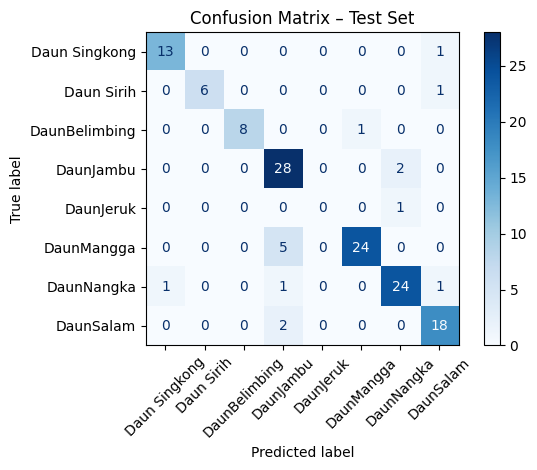

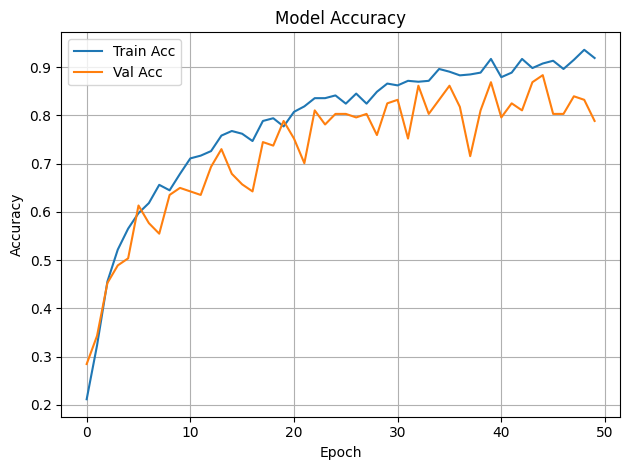

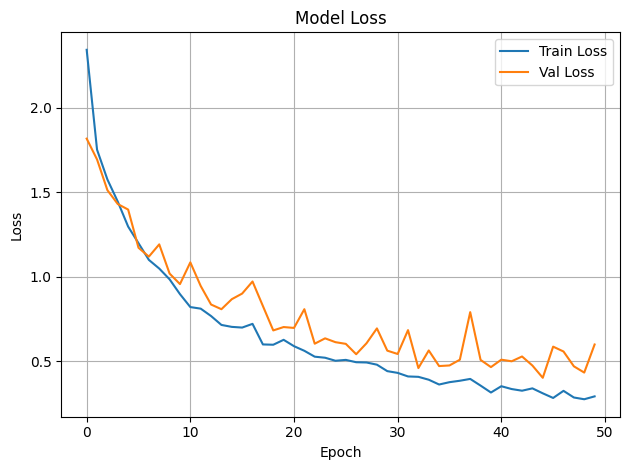

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣  ── Muat model terbaik (hasil ModelCheckpoint)
best_model = tf.keras.models.load_model('/content/drive/MyDrive/models/cnn_daun_12kelas.h5')

# 2️⃣  ── Evaluasi cepat (loss & accuracy) pada data uji
test_loss, test_acc = best_model.evaluate(val_data)   # pastikan Anda sudah punya test_data generator # Changed to val_data
print(f"Test loss  : {test_loss:.4f}")
print(f"Test acc   : {test_acc:.4f}")

# 3️⃣  ── Prediksi label untuk seluruh test_data
y_true        = val_data.classes                                   # label ground‑truth (integer) # Changed to val_data
y_pred_probs  = best_model.predict(val_data, verbose=0) # Changed to val_data
y_pred        = np.argmax(y_pred_probs, axis=1)                     # konversi ke integer label

# 4️⃣  ── Classification report (precision, recall, f1, support)
class_names = list(val_data.class_indices.keys())                  # urutan nama kelas # Changed to val_data
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5️⃣  ── Confusion matrix
cm   = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix – Test Set")
plt.tight_layout(); plt.show()

# 6️⃣  ── Plot learning history (accuracy & loss)
plt.figure()
plt.plot(cnn_history.history['accuracy'],     label='Train Acc') # Corrected variable name
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc') # Corrected variable name
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Model Accuracy'); plt.grid(True)
plt.tight_layout(); plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'],     label='Train Loss') # Corrected variable name
plt.plot(cnn_history.history['val_loss'], label='Val Loss') # Corrected variable name
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Model Loss'); plt.grid(True)
plt.tight_layout(); plt.show()

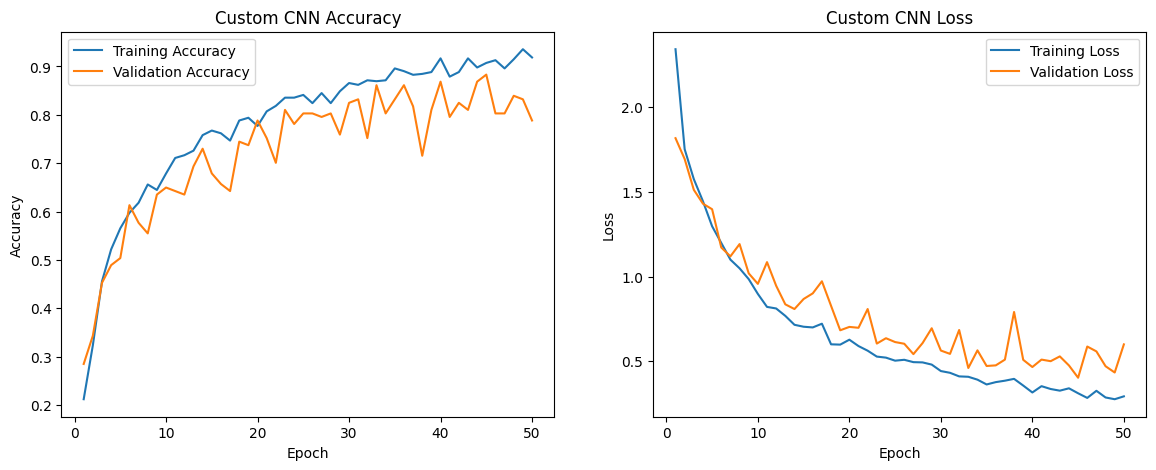

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14,5))

    # Plot Akurasi
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Panggil model
plot_training_history(cnn_history, 'Custom CNN')